In [1]:
import torch
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,),(1,))
])
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
input_size = 784
hidden_size = 512
output_size = 10

# neural network structure
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_forward = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        output = self.linear_relu_forward(x)
        return output

model = NeuralNetwork()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10


In [4]:
loss_cache = []
def train_loop(dataloader):
    model.train()
    for batch, (X, Y) in enumerate(dataloader):
        # forward prop
        pred = model(X)
        loss = loss_func(pred, Y)
        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_cache.append(loss.item())
        if batch % 1000 == 0:  
            print(f"Current loss: {loss.item()}")

def test_loop(dataloader):
    model.eval() # sets to evaluation mode
    size = len(dataloader.dataset)
    correct = 0
    with torch.no_grad():
        for X, Y in dataloader: 
            pred = model(X)
            correct += (pred.argmax(1) == Y).sum().item()

    print(f"Accuracy: {correct / size * 100}%")

print(len(train_loader.dataset))
for t in range(epochs):
    print(f"Epoch #{t+1}")
    train_loop(train_loader)
    test_loop(test_loader)

60000
Epoch #1
Current loss: 2.308678150177002
Accuracy: 97.11666666666666%
Epoch #2
Current loss: 0.13061809539794922
Accuracy: 97.79833333333333%
Epoch #3
Current loss: 0.11914654821157455
Accuracy: 98.78%
Epoch #4
Current loss: 0.06878773868083954
Accuracy: 98.86666666666667%
Epoch #5
Current loss: 0.025443920865654945
Accuracy: 98.575%
Epoch #6
Current loss: 0.005628862883895636
Accuracy: 99.165%
Epoch #7
Current loss: 0.004139658063650131
Accuracy: 99.50666666666666%
Epoch #8
Current loss: 0.00272661866620183
Accuracy: 99.60166666666666%
Epoch #9
Current loss: 0.003435878548771143
Accuracy: 99.43833333333333%
Epoch #10
Current loss: 0.013074211776256561
Accuracy: 99.38666666666667%


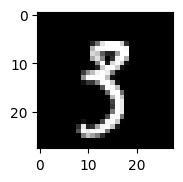

Model Prediction: 3
Correct Answer: 3


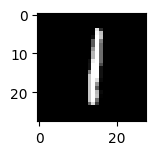

Model Prediction: 1
Correct Answer: 1


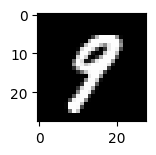

Model Prediction: 9
Correct Answer: 9


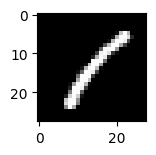

Model Prediction: 1
Correct Answer: 1


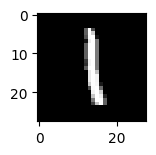

Model Prediction: 1
Correct Answer: 1


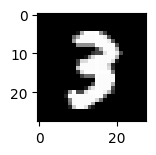

Model Prediction: 3
Correct Answer: 3


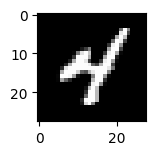

Model Prediction: 4
Correct Answer: 4


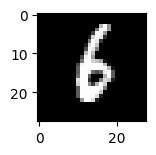

Model Prediction: 6
Correct Answer: 6


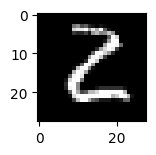

Model Prediction: 2
Correct Answer: 2


In [5]:
plt.figure(figsize=(6,6))
images, labels = next(iter(train_loader))
for i in range(9):    
    plt.subplot(3, 3, i+1)
    idx = randint(0, 63)
    image = images[idx]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.show()

    pred = model(image)
    print(f"Model Prediction: {int(pred.argmax(1))}")
    print(f"Correct Answer: {labels[idx]}")

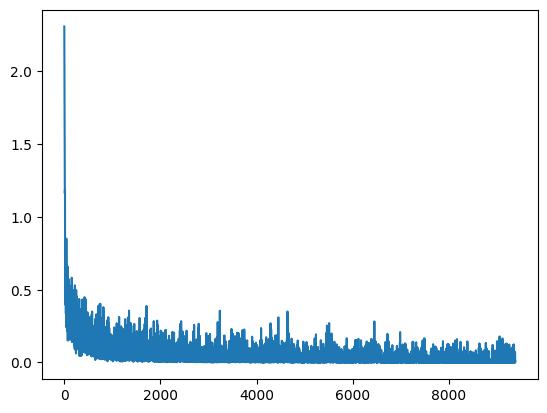

In [6]:
plt.plot(loss_cache)
plt.show()